In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split


import category_encoders
import category_encoders as ce

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score

from sklearn import tree

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
path = '/home/pradeep/Documents/Deeplearning/Decision_tree/car_evaluation.csv'

df = pd.read_csv(path, header=None)


In [5]:
df.shape

(1728, 7)

In [6]:
df.head()


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [11]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [12]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [13]:
X = df.drop(['class'], axis=1)

y = df['class']

In [14]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [15]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape



((1157, 6), (571, 6))

In [16]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [17]:
# encode variables with ordinal encoding

# import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [18]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
y_pred_gini = clf_gini.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred_gini)

0.8021015761821366

In [21]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini


array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [22]:
clf_gini.score(X_train, y_train)


0.7865168539325843

In [23]:
clf_gini.score(X_test, y_test)


0.8021015761821366

In [24]:
pd.DataFrame(index=X.columns,data=clf_gini.feature_importances_,columns=['Feature Importance'])

,Feature Importance
buying,0.135144
maint,0.000000
doors,0.000000
persons,0.505174
lug_boot,0.000000
safety,0.359682


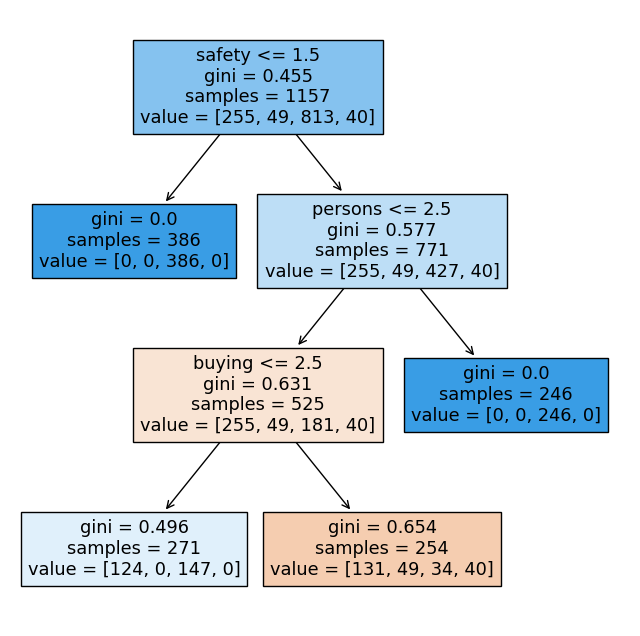

In [25]:
plt.figure(figsize=(8,8),dpi=100)
plot_tree(clf_gini,filled=True,feature_names=X.columns);

In [26]:
(X_train['safety']<=1.5).sum()


386

In [27]:
(X_train['safety']>1.5).sum()

771

In [28]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
y_pred_en = clf_en.predict(X_test)


In [30]:
accuracy_score(y_test, y_pred_en)


0.8021015761821366

In [31]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en


array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [33]:
accuracy_score(y_train, y_pred_train_en)

0.7865168539325843

In [34]:
clf_en.score(X_train, y_train)


0.7865168539325843

In [35]:
clf_en.score(X_test, y_test)


0.8021015761821366

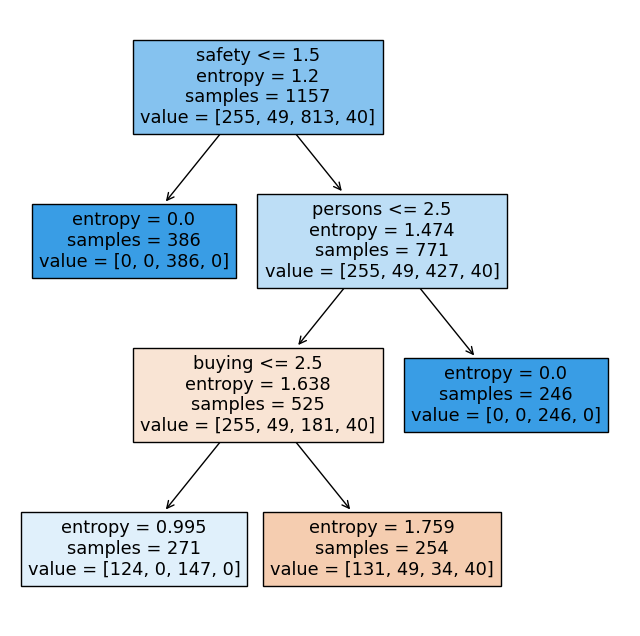

In [36]:
plt.figure(figsize=(8,8))

plot_tree(clf_en,filled=True,feature_names=X.columns);

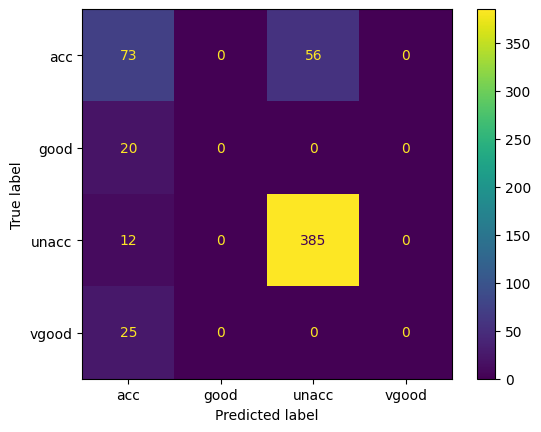

In [38]:
 #Print the Confusion Matrix and slice it into four pieces

plot_confusion_matrix(clf_en, X_test, y_test)



In [39]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



In [40]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2)

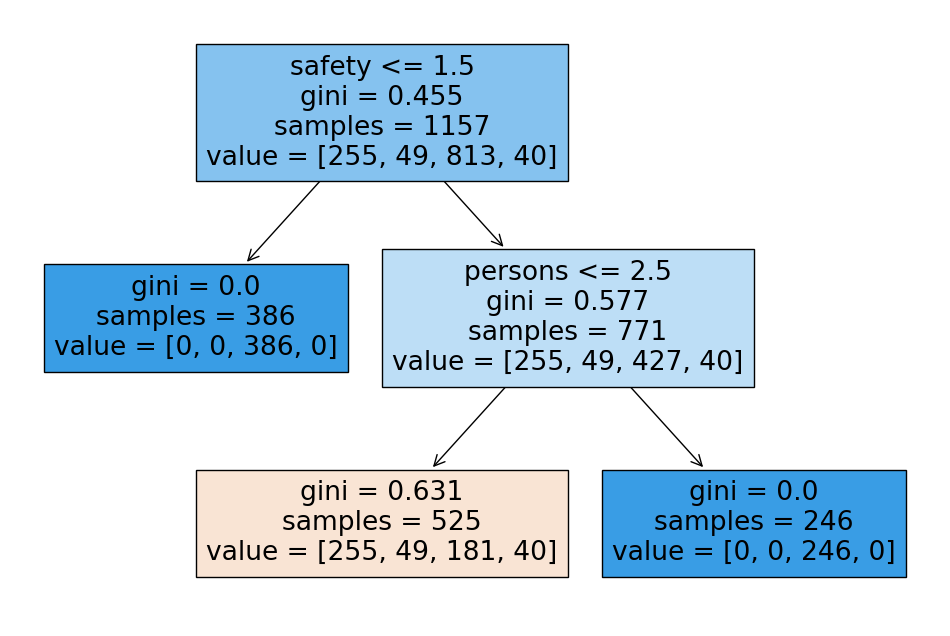

In [41]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(pruned_tree,filled=True,feature_names=X.columns);

In [42]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=5)
pruned_tree.fit(X_train,y_train)


DecisionTreeClassifier(max_leaf_nodes=5)

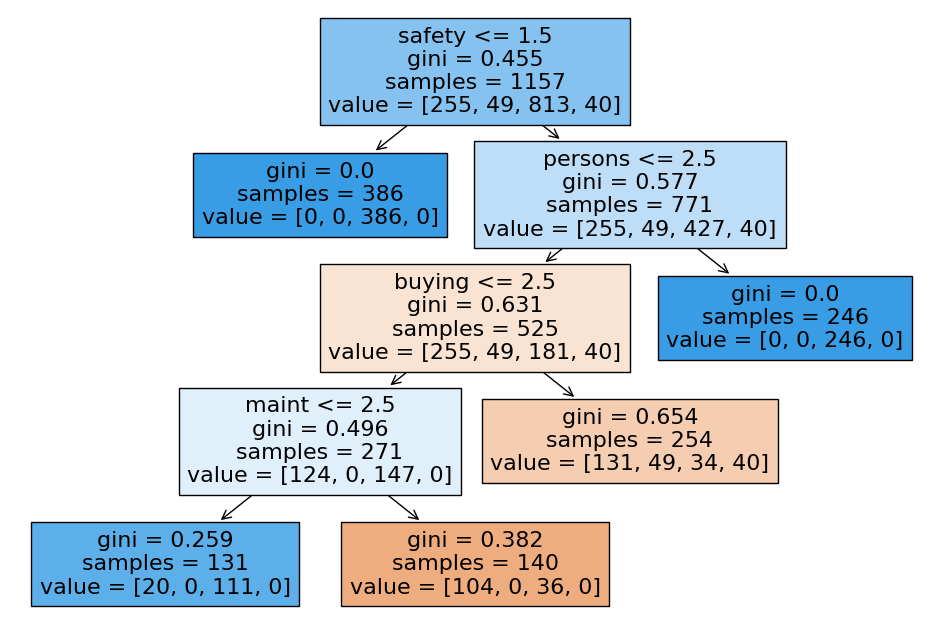

In [43]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(pruned_tree,filled=True,feature_names=X.columns);
